<a href="https://colab.research.google.com/github/jungeun919/Keras_study/blob/main/Hands-On/Training_Linear_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

In [ ]:
# 정규방정식 테스트를 위한 가상의 데이터 생성
import numpy as np

# 100개를 만듦 (행: 100, 열: 1)
X = 2 * np.random.rand(100, 1) # training data feature의 range를 [0, 1] -> [0, 2]로 변경하기 위해 2를 곱함
y = 4 + 3 * X + np.random.rand(100, 1) # prediction 식, np.random.rand()는 noise

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가, 1로 채워진 100 * 1 행렬은 만든 뒤 행렬을 붙임 (-> 100 * 2)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 정규방정식
# inv(): 사용해 역행렬 계산
# dot(): 행렬 곱셈 계산

theta_best # 정규방정식으로 계산한 값 확인

array([[4.52622642],
       [2.98594552]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가
# [1  0
#  1  2]

y_predict = X_new_b.dot(theta_best)
y_predict # X_new에 대한 예측값 확인

array([[ 4.52622642],
       [10.49811747]])

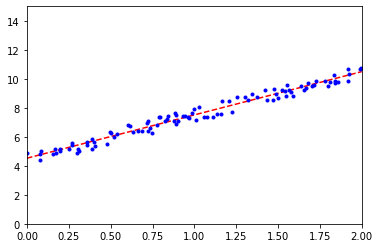

In [ ]:
# 모델의 예측을 그래프화
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
# 사이킷런으로 선형회귀 예측
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) # 훈련
lin_reg.intercept_, lin_reg.coef_ # 세타0, 세타1에 대한 값 확인

(array([4.52622642]), array([[2.98594552]]))

In [ ]:
lin_reg.predict(X_new) # X_new에 대한 예측값 확인

array([[ 4.52622642],
       [10.49811747]])

In [ ]:
# LinearRegression 클래스는 scipy.linalg.lstsq 함수를 기반으로 함
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.52622642],
       [2.98594552]])

In [ ]:
np.linalg.pinv(X_b).dot(y) # 유사역행렬 구하기

array([[4.52622642],
       [2.98594552]])

# 경사하강법

In [ ]:
# 파라미터 결정
eta = 0.1 # 학습률
n_iterations = 1000 # 반복 횟수
m = 100 # 데이터 개수

# 찾아야 할 모델 파라미터
theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 기울기 구하기
    theta = theta - eta * gradients # theta 갱신, 내려가는 스텝의 크기를 결정하기 위해 gradient 벡터에 학습률을 곱함

theta # 값 확인 (정규방정식으로 찾은 결과와 동일)

array([[4.52622642],
       [2.98594552]])

In [ ]:
# 학습 스케줄을 사용한 확률적 경사하강법
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m): # m: training data의 개수만큼 반복
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # random_index에 해당하는 샘플
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients # theta 업데이트

theta # 값 확인

array([[4.51967508],
       [2.99885747]])

In [ ]:
# 사이킷런을 활용하여 SGD
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) # 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행
sgd_reg.fit(X, y.ravel()) # 훈련 사이킷런을 활용하여 SGD

sgd_reg.intercept_, sgd_reg.coef_ # 정규방정식으로 구한 값과 유사한 값값

(array([4.53169918]), array([3.00791202]))

# 다항회귀

In [ ]:
import numpy as np

np.random.seed(42)

In [ ]:
# 데이터셋 생성
# 각 특성의 거듭제곱이나 특성간의 곱을 새로운 특성으로 확장하여 선형회귀를 적용
m = 100
X = 6 * np.random.rand(m, 1) - 3 # X의 범위: [0, 1] -> [0, 6] -> [-3, 3]의 분포를 가짐 데이터셋 생성
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # np.random.randn()는 noise

In [ ]:
# 훈련 데이터 변환
from sklearn.preprocessing import PolynomialFeatures

# 훈련세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가
# X_poly는 원래 특성 X와 이 특성의 제곱을 포함
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
# 확장된 훈련 데이터에 LinearRegression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# ====================7주차====================

In [ ]:
# ctrl m m : markdown
# ctrl m d : delete
# ctrl m a : code

# 학습 곡선

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 훈련 데이터에서 모델의 학습 곡선을 그리는 함수
# 그래프를 생성하기 위해 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련시킴 
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10) # 훈련세트, 검증세트를 나눔
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train_set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val_set")

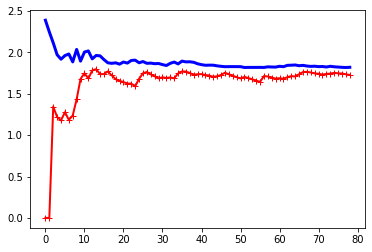

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y) # 단순 선형 회귀 모델의 학습곡선 그리기

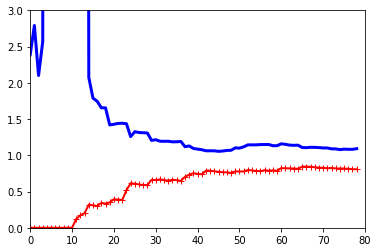

In [ ]:
from sklearn.pipeline import Pipeline

# 다항 회귀 모델의 학습 곡선 그리기
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), # 10차 다항 회귀
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()
# -> 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
# -> 두 곡선 사이의 공간은 훈련 데이터에서의 모델 성능이 검증 데이터보다 훨씬 좋다는 것이다. (과대적합)

# 규제가 있는 선형 모델

In [ ]:
# 1. 릿지 회귀
# 정규방정식을 사용한 릿지 회귀 적용
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y) # 훈련
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [ ]:
# 확률적 경사하강법 사용
sgd_reg = SGDRegressor(penalty="l2") # penalty l2는 SGD가 비용함수에 가중치 벡터의 노름의 제곱을 2로 나눈 규제항을 추가하게 함
sgd_reg.fit(X, y.ravel()) # 훈련
sgd_reg.predict([[1.5]])

array([4.80078479])

In [ ]:
# 2. 라쏘 회귀
# Lasso 대신 SGDRegressor(penalty="l1") 사용 가능
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1) # Lasso 클래스 사용
lasso_reg.fit(X, y) # 모델 훈련
lasso_reg.predict([[1.5]])

array([4.77621741])

In [ ]:
# 3. 엘라스틱넷
from sklearn.linear_model import ElasticNet

# ElasticNet 클래스 사용
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio: 혼합 비율 r (r=0: 릿지 회귀, r=1: 라쏘 회귀)
elastic_net.fit(X, y) # 모델 훈련
elastic_net.predict([[1.5]])

array([4.78114505])

In [ ]:
# 4. 조기 종료: 검증 에러가 최솟값에 도달하면 훈련을 중지
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True로 지정하면 fit() 메서드가 호출될 때 이전 모델 파라미터에서 훈련을 이어나감
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# 로지스틱 회귀

In [ ]:
# 결정 경계
from sklearn import datasets

iris = datasets.load_iris() # 데이터 로드
list(iris.keys()) # 데이터의 key list 확인

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"]==2).astype(np.int) # Iris-Virginica이면 1, 아니면 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y) # 로지스틱 회귀 모델 훈련

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

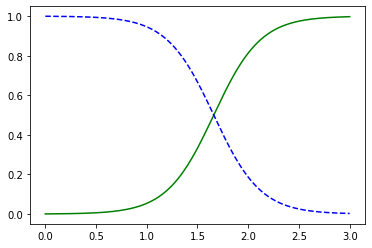

In [ ]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산 (그래프 출력)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [ ]:
log_reg.predict([[1.7], [1.5]]) # 로지스틱 회귀를 통해 예측

array([1, 0])

In [ ]:
# 소프트맥스 회귀
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

# multi_class의 매개변수를 multinomial로 바꾸면 소프트맥스 회귀 사용 가능
# solver 매개변수에 lbfgs 알고리즘 지정해주어야 함
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
softmax_reg.predict([[5, 2]]) # 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃 예측 (클래스)

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]]) # 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃 예측 (확률)

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])